In [18]:
df<-read.csv('d:/data/wine/winequality-red2.csv')
head(df)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,class
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,0
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,0
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,1
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,0


In [19]:
library(dplyr)
df<-df %>% select(-quality)
dim(df)
head(df)

[1] 1599   12

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,class
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,0
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,0
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,1
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,0



  0   1 
744 855 

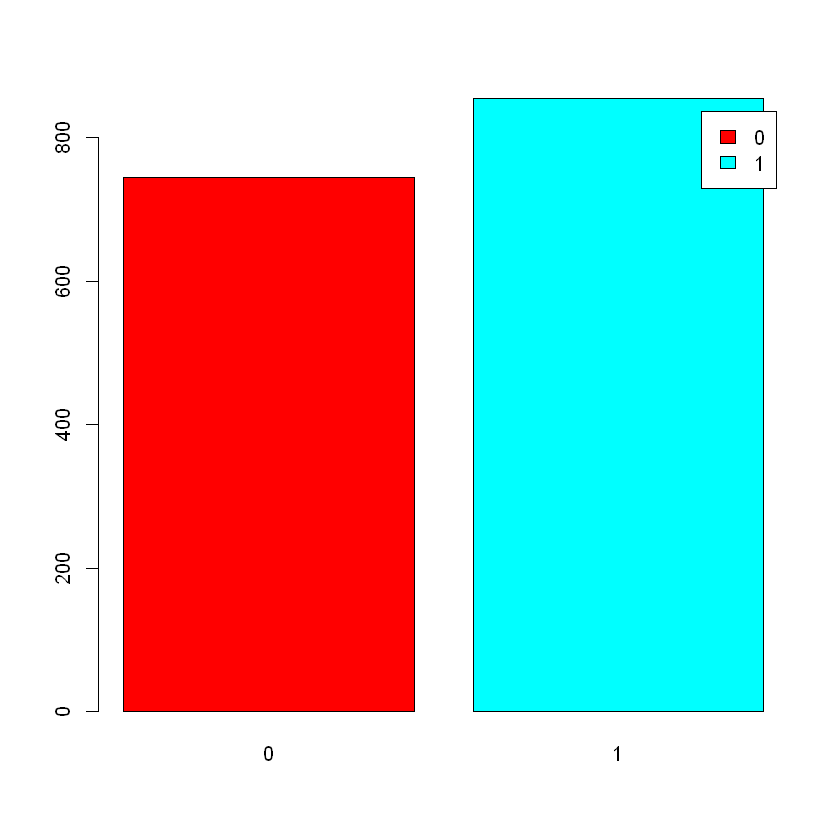

In [20]:
(tbl<-table(df$class))
barplot(tbl,beside=T,legend=T,col=rainbow(2)) #카운트플롯

In [21]:
library(ROSE)
#언더샘플링
df_samp<-ovun.sample(class ~., data=df, seed=1, method='under',
                    N=744*2)$data
(tbl<-table(df_samp$class))


  0   1 
744 744 

In [22]:
library(caret)
set.seed(100)
idx_train<-createDataPartition(y=df$class, p=0.8, list=F)
train<-df[idx_train,]
X_train<-train[,-12]
y_train<-train[,12]
test<-df[-idx_train,]
X_test<-test[,-12]
y_test<-test[,12]

[1] 0.8056426 0.7366771 0.7335423 0.6959248 0.6927900 0.6520376 0.6457680
 [8] 0.6583072 0.6645768 0.6802508

k,accuracy
1,0.8056426
2,0.7366771
3,0.7335423
4,0.6959248
5,0.6927900
6,0.6520376
7,0.6457680
8,0.6583072
9,0.6645768
10,0.6802508


k,accuracy
1,0.8056426


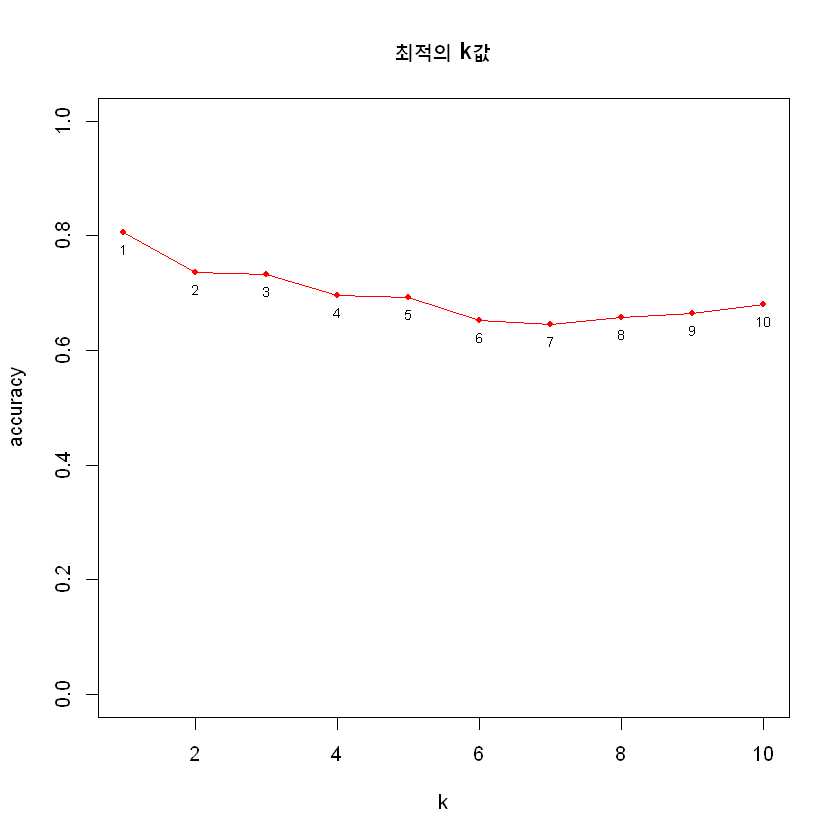

In [23]:
library(class)
acc<-NULL #비어있는 벡터 
for ( i in c(1:10)){ #k값을 1~10까지 증가시키면서 예측정확도 비교
    set.seed(123)
    pred=knn(train=train,test=test,cl=y_train,k=i)
    #벡터에 결과값 추가
    acc<-c(acc,mean(y_test == pred))

}
acc
df<-data.frame(k=c(1:10), accuracy=acc) #데이터프레임 생성
plot(accuracy ~ k, data=df, type='o', pch=20, main='최적의 k값',
    ylim=c(0,1),col='red')
#그래프에 라벨 추가
with(df,text(accuracy ~ k, labels = c(1:10), pos=1, cex=0.7))
df
#정확도가 가장 높은 k의 값 구하기
n<-min(df[df$accuracy %in% max(acc), 'k'])
df[n,]

In [24]:
library(class)
set.seed(123) #랜덤시드 고정
# knn 함수 knn(train=학습용데이터, test=검증용데이터,cl=분류라벨, k=이웃의 수)
pred<-knn(train=train, test=test, cl=y_train, k=n)
pred #모형이 예측한 값
y_test #실제값

[1] 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0
 [38] 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1
 [75] 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0
[112] 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0
[149] 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1
[186] 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
[223] 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1
[260] 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0
[297] 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1
Levels: 0 1

[1] 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0
 [38] 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1
 [75] 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1
[112] 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
[149] 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1
[186] 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0
[260] 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0
[297] 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1

In [25]:
table(y_test,pred) #오분류표
mean(y_test==pred) #예측정확도

      pred
y_test   0   1
     0 104  36
     1  26 153

[1] 0.8056426